In [2]:
import csv
import numpy as np
import os
import pandas as pd
import sqlite3 as sql
%matplotlib inline

# Families and the titanic
## Questions to investigate:

   How accurate was titanic the movie?
   Were women and children more likely to survive?
   Were people in the lower class less likely to survive?
    

## Loading the Data

In [11]:
cwd = os.getcwd()
data_set = os.path.join(cwd,"titanic.db")
conn = sql.connect(data_set)
df = pd.read_sql("select * from titanic;", conn)
df.info()

/Users/jklein/data_analyst/P2-Investigate-a-Dataset/titanic.db
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
index          891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


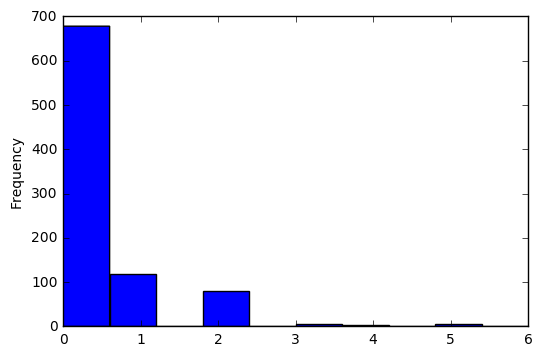

In [31]:
#Create Family size feature
df['family_size']= df['SibSp'] + df['Parch']
%matplotlib inline
# df['family_size'].plot(kind = "hist")
# df['SibSp'].plot(kind = "hist")
df['Parch'].plot(kind = "hist")



In [31]:
SibSpSurvival = pd.read_sql("""
    select 
        SibSp
        ,cast(sum(survived) as float)/cast(count(survived) as float) as SurvivalRate
    from titanic
    group by SibSp;
""", conn)

SibSpSurvival

,SibSp,SurvivalRate
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [29]:
ParchSurvival = pd.read_sql("""
    select 
        Parch
        ,cast(sum(survived) as float)/cast(count(survived) as float) as SurvivalRate
    from titanic
    group by Parch;
""", conn)

ParchSurvival

,Parch,SurvivalRate
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


## Family size Survival Rate

In [52]:
df['FamilySize']= df['Parch']+df['SibSp']
df[['FamilySize','Survived']].groupby(by=["FamilySize"])["Survived"].sum()
df[['FamilySize','Survived']].groupby(by=["FamilySize"])["Survived"].count()


FamilySize
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Survived, dtype: int64

## Create Gender Feature

In [6]:
sex_dummies = pd.get_dummies(df['Sex'])
pd.concat([df,sex_dummies], axis=1)
sex_dummies


,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0


In [84]:
df = pd.read_sql("select * from titanic where age<20;", conn)
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,None,S
1,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,None,C
2,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
3,14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,None,S
4,16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,None,Q
5,22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.00,0,0,330923,8.0292,None,Q
6,24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,None,S
7,27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
8,38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.00,2,0,345764,18.0000,None,S
9,39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.00,1,0,2651,11.2417,None,C


In [79]:
PClass = pd.read_sql("""
                select 
                 cast( sum(Survived) as float)/cast(count(Survived) as float) as SurvivalRate,
                 Pclass
                from titanic
                group by Pclass;"""
                 , conn)
PClass

,SurvivalRate,Pclass
0,0.629630,1
1,0.472826,2
2,0.242363,3


In [82]:
Gender = pd.read_sql("""
                select 
                 cast( sum(Survived) as float)/cast(count(Survived) as float) as SurvivalRate--,
                 --Sex
                from titanic
               -- group by Sex;"""
                 , conn)
Gender
df['Name']

KeyError: 'Name'

-- A real man makes his own luck https://www.youtube.com/watch?v=OO0GhTe9X6I
-- Class break out https://www.youtube.com/watch?v=gQ-2ZcDxTlY 
-- Women and Children https://www.youtube.com/watch?v=BQHaR_OdghI
-- Not the better half will die -- https://www.youtube.com/watch?v=kQ8WsD9AGX4